In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("tips.csv")

In [45]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [48]:
#Summary Statistics 
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [49]:
df['day'].value_counts(normalize=True) # percentage

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

In [50]:
import seaborn as sns


<Axes: xlabel='count', ylabel='day'>

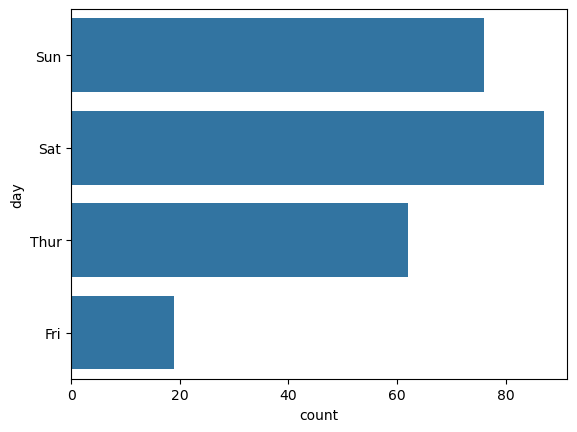

In [51]:
sns.countplot(df['day'])

<Axes: ylabel='count'>

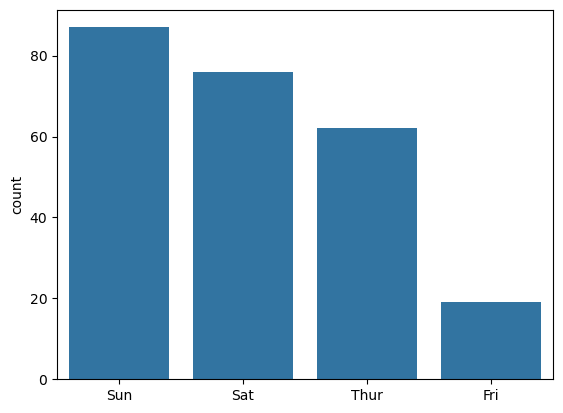

In [52]:
sns.barplot(x=df['day'].unique(),y=df['day'].value_counts())

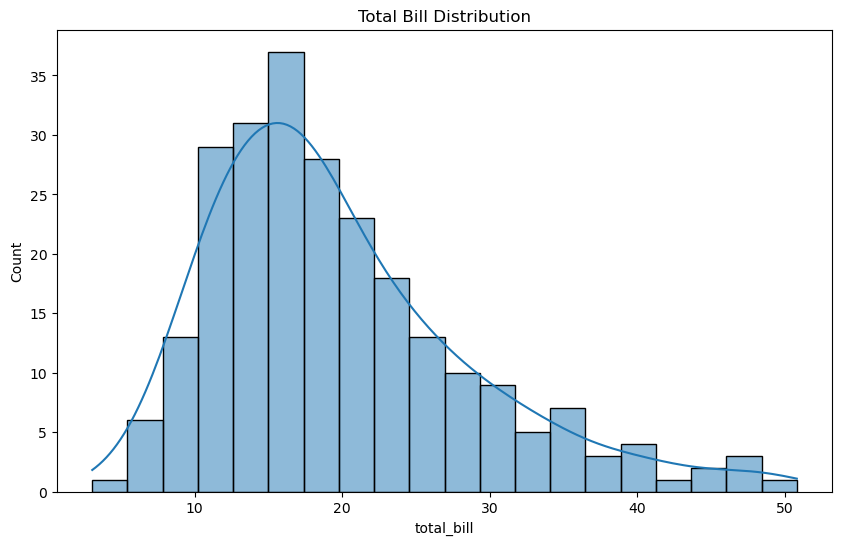

In [53]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
sns.histplot(df['total_bill'],kde=True,bins=20)
plt.title("Total Bill Distribution")
plt.show()

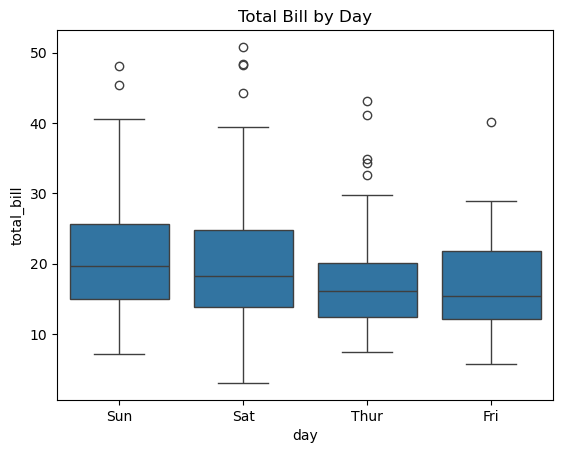

In [54]:
sns.boxplot(x='day',y='total_bill',data=df)
plt.title("Total Bill by Day")
plt.show()

In [55]:
# newdf = df[['tip','total_bill']]
# sns.heatmap(data=newdf)

[]

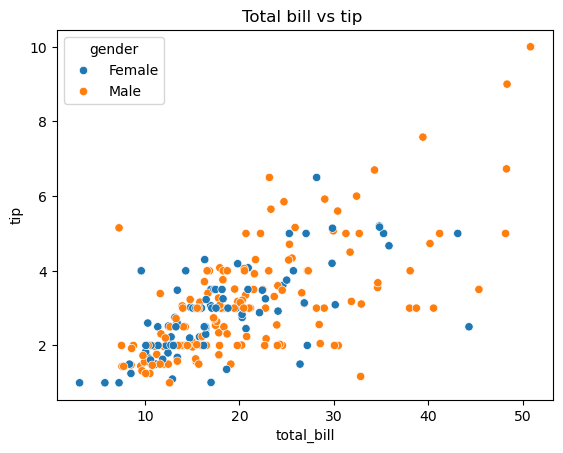

In [56]:
sns.scatterplot(x='total_bill',y='tip',hue='gender',data=df)
plt.title("Total bill vs tip ")
plt.plot()

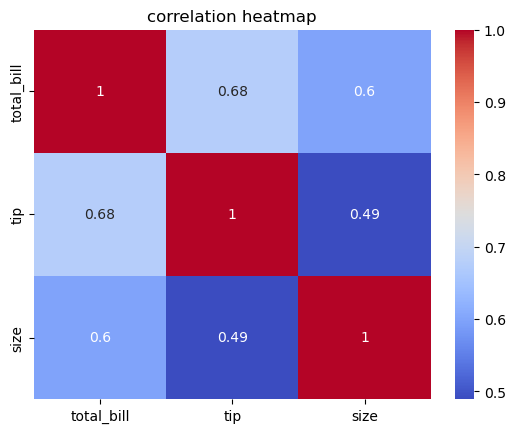

In [57]:
corr_mat = df.select_dtypes(include='number').corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

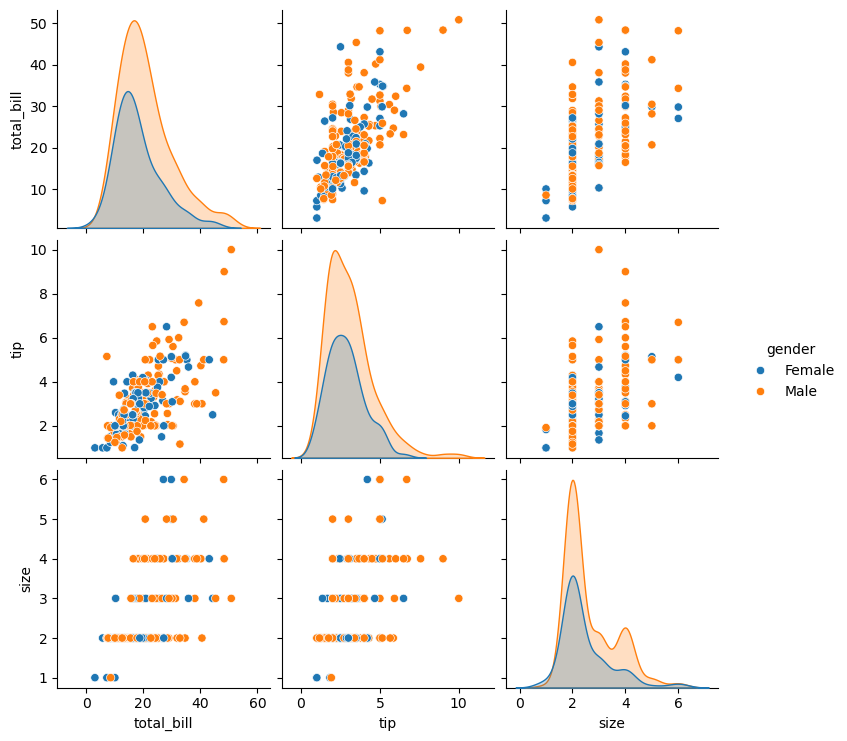

In [62]:
sns.pairplot(df,hue='gender')
plt.show()

In [60]:
#Eelation between Gender and smoking habit 
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(df['gender'],df['smoker'])
chi2,p,dof,expected = chi2_contingency(contigency_table)
print(f"Chi2:{chi2},P-value :{p}, dof:{dof}")


Chi2:0.0,P-value :1.0, dof:1
